In [38]:
import csv

variant_data = []
feature_vectors = []
diseases = []

with open("ATP1A3_variants_2D.csv", "r") as fh:
    for row in csv.reader(fh):
        variant_data.append(row)
        
domains = {"cation_ATPase_N": 1,
           "E1-E2_ATPase": 2,
           "cation_ATPase": 3,
           "cation_ATPase_C": 4,
           "unannotated domain": 5}

disease_codes = {"DD": 1,
                 "AHC": 2,
                 "RDP + AHC": 3,
                 "CAPOS": 4,
                 "RDP": 5,
                 "Catastrophic Early Life Epilepsy": 6,
                 "Epilepsy and recurrent apnea": 7,
                 "RDP + AHC + CAPOS": 8,
                 "Childhood-onset schizophrenia": 9}

def provean_sift_pred(p_score, s_score):
    if (p_score < -2.5) and (s_score > 0.05):
        return 2
    elif (p_score < -2.5) or (s_score > 0.05):
        return 1
    elif (p_score > -2.5) and (s_score < 0.05):
        return 0

for variant in variant_data:
    #dom = domains[variant[0]]
    pos = int(variant[0])
    #in_sil = provean_sift_pred(float(variant[1]), float(variant[2]))
    in_sil = float(variant[1])
    disease = variant[3]
    
    feature_vectors.append([pos, in_sil])
    diseases.append(disease_codes[disease])

In [39]:
from sklearn import svm

X = feature_vectors
y = diseases

clf = svm.SVC(C=0.5)
clf.fit(X, y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

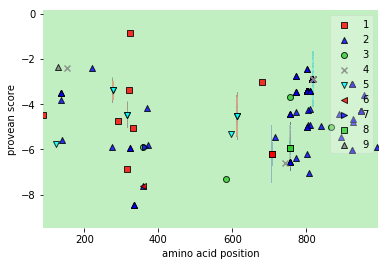

In [41]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np


plot_decision_regions(np.array(X), np.array(y), clf=clf)
plt.xlabel("amino acid position")
plt.ylabel("provean score")
#plt.title('SVM on Iris')
plt.show()

In [42]:
clf.score(X, y)

0.9166666666666666